In [19]:
import numpy as np
import pandas as pd
import sklearn.datasets
%matplotlib inline
import matplotlib.pyplot as plt
import random
from sklearn.preprocessing import Imputer
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
from sklearn import decomposition
from sklearn import cluster
import pylab as pl
import hypertools as hyp

from sklearn.cluster import AgglomerativeClustering, DBSCAN, Birch, SpectralClustering, MeanShift, AffinityPropagation

In [2]:
df = pd.read_csv('datasets/modified.csv', index_col=0)
print df.info()
df = df.drop(['roundInvestmentAmount'], axis=1)
df_test = df[:20]
df_train = df[0:80]
print df_test
#df['roundInvestmentAmount'][0]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111 entries, 0 to 110
Data columns (total 5 columns):
roundInvestmentAmount    111 non-null object
round                    111 non-null int64
businessModelInt         111 non-null int64
industry                 111 non-null int64
natureOfInvestment       111 non-null int64
dtypes: int64(4), object(1)
memory usage: 5.2+ KB
None
    round  businessModelInt  industry  natureOfInvestment
0       0                 1         0                   1
1       5                 1         3                   1
2       1                 0         0                   1
3       4                 0         0                   1
4       0                 1         1                   1
5      -1                 1         2                   1
6       0                 1         2                   1
7       0                 0         0                   1
8       5                 0         0                   1
9       1                 0         4   

In [15]:
pca = decomposition.PCA()
pca.fit(df_train)
print(pca.explained_variance_)  
pca_train = pca.transform(df)
pca_test = pca.transform(df_test)

##Component 1 and 2 that is, round and business model type play a larger role

[ 5.54565678  3.12872425  0.46669144  0.0541807 ]


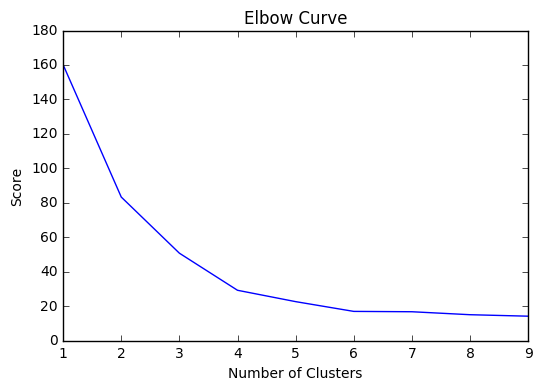

In [4]:
from sklearn.cluster import KMeans
Nc = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [-kmeans[i].fit(pca_train).score(pca_test) for i in range(len(kmeans))]
score
pl.plot(Nc,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

In [6]:
# Create the KMeans model
clf = cluster.KMeans(init='k-means++', n_clusters=6, random_state=42)

# Fit the training data to the model
clf.fit_transform(pca_train)
clf.predict(pca_test)
clf.score(pca_test)


-16.900136179356981

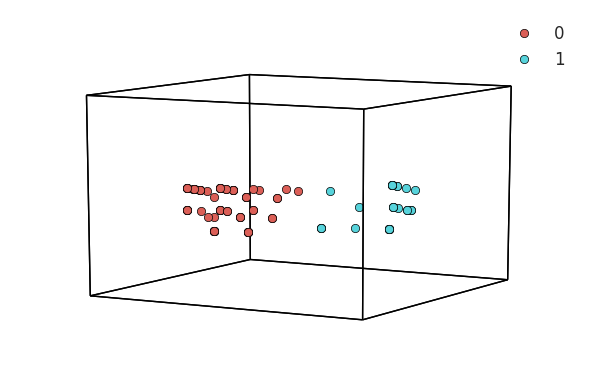

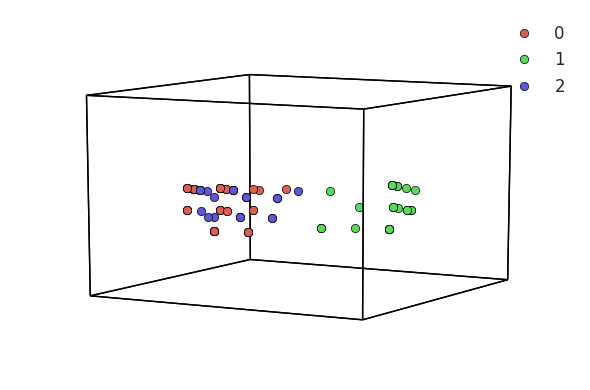

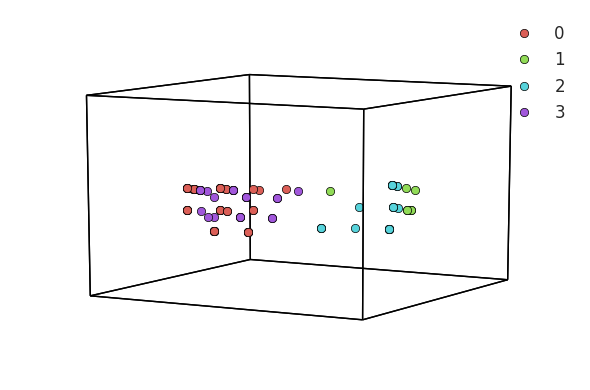

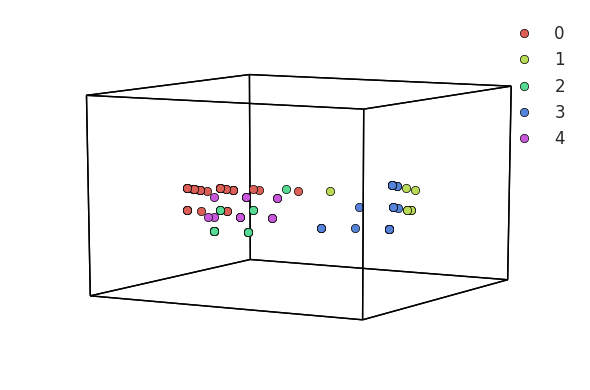

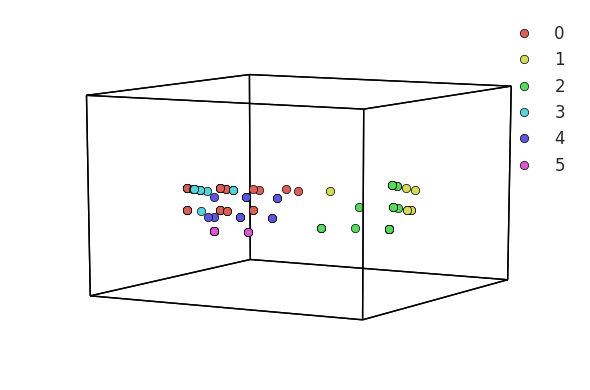

Birch
****Results****
<bound method Birch.get_params of Birch(branching_factor=50, compute_labels=True, copy=True, n_clusters=3,
   threshold=0.5)>



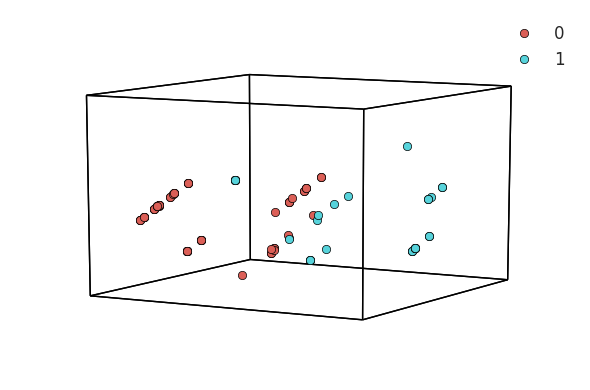

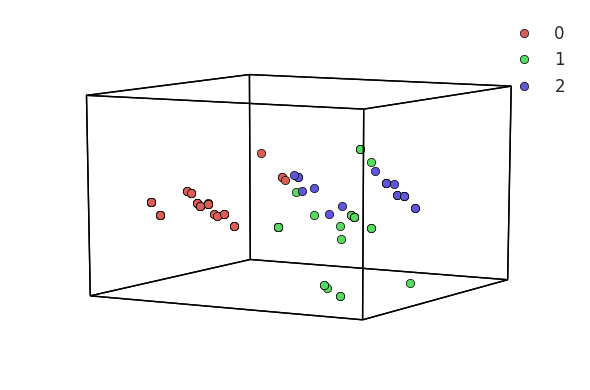

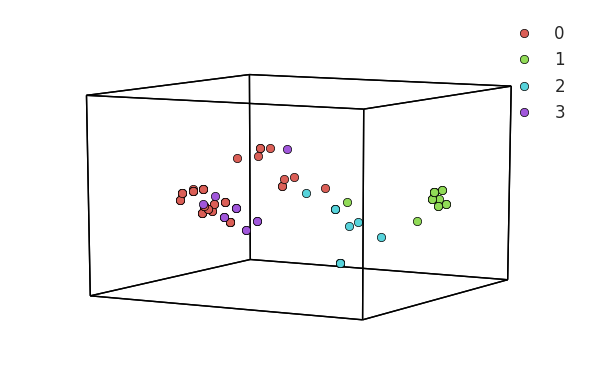

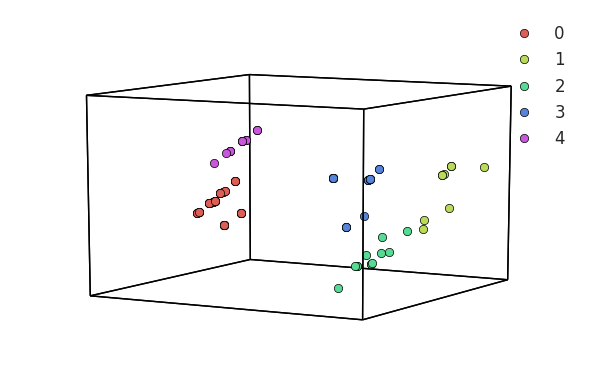

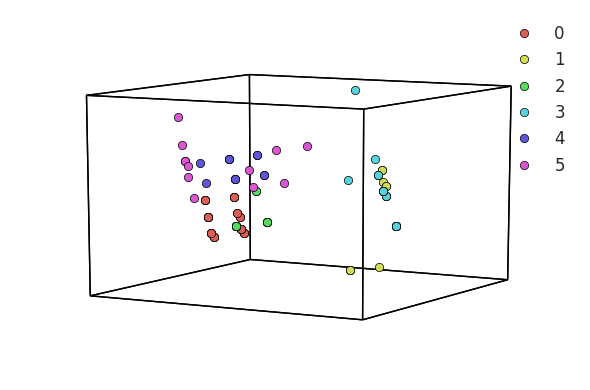

SpectralClustering
****Results****
<bound method SpectralClustering.get_params of SpectralClustering(affinity='rbf', assign_labels='kmeans', coef0=1, degree=3,
          eigen_solver=None, eigen_tol=0.0, gamma=1.0, kernel_params=None,
          n_clusters=8, n_init=10, n_jobs=1, n_neighbors=10,
          random_state=None)>



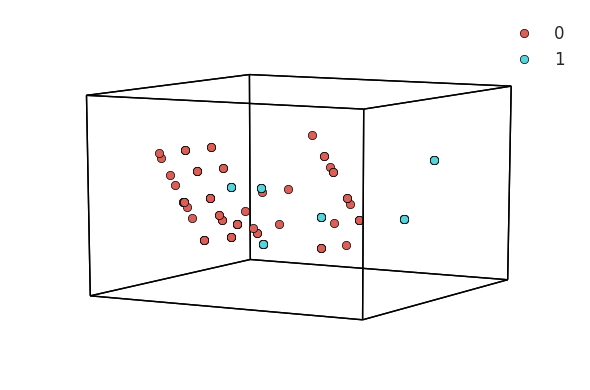

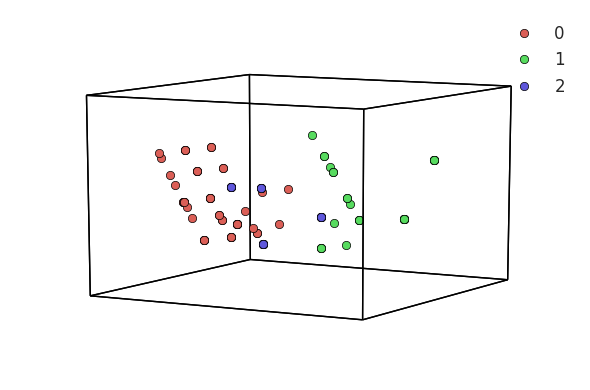

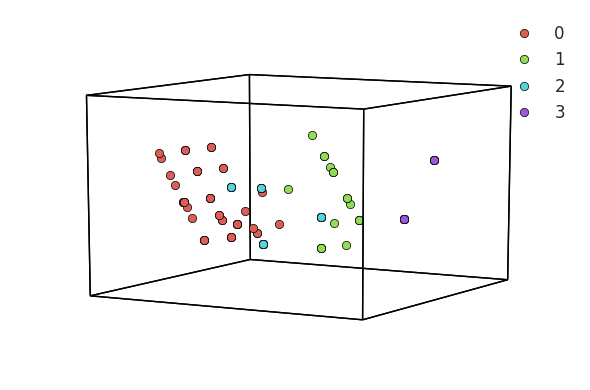

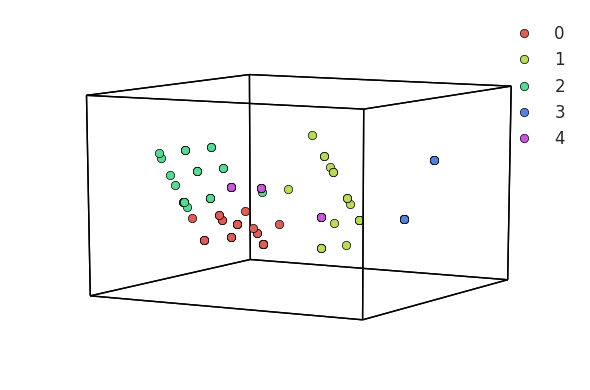

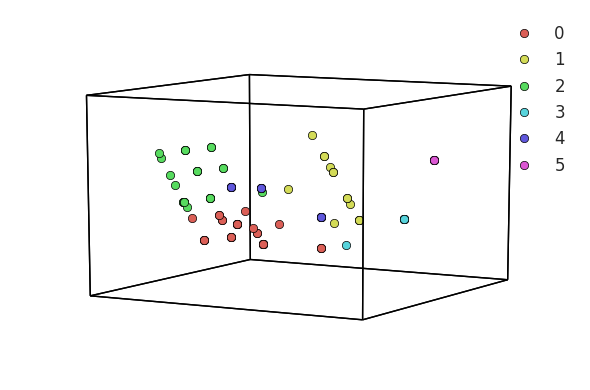

DBSCAN
****Results****
<bound method DBSCAN.get_params of DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=5, n_jobs=1, p=None)>



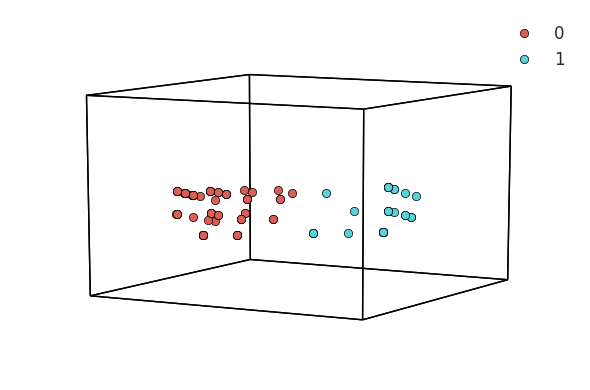

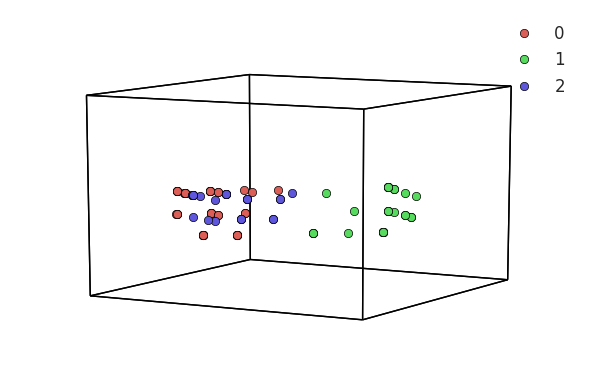

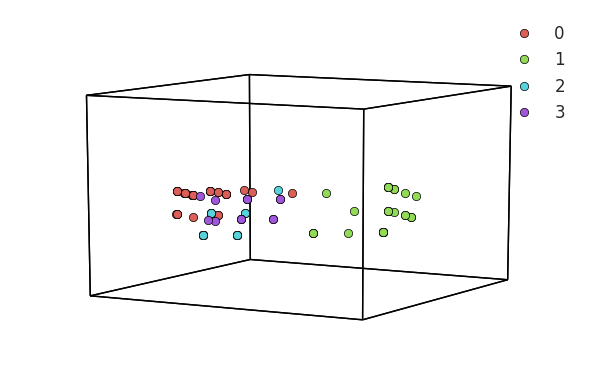

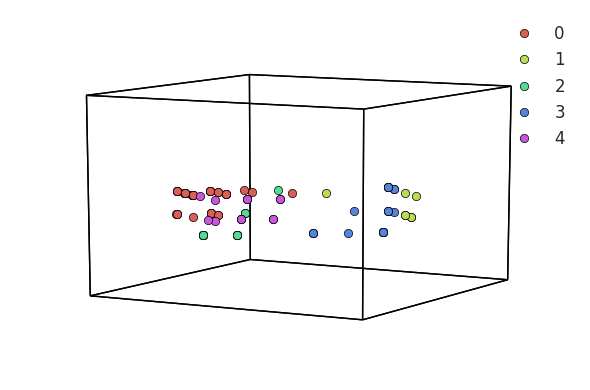

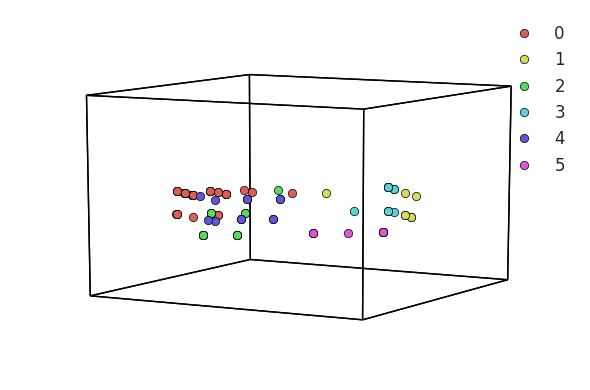

AgglomerativeClustering
****Results****
<bound method AgglomerativeClustering.get_params of AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward', memory=None, n_clusters=2,
            pooling_func=<function mean at 0x7fdfdc050848>)>



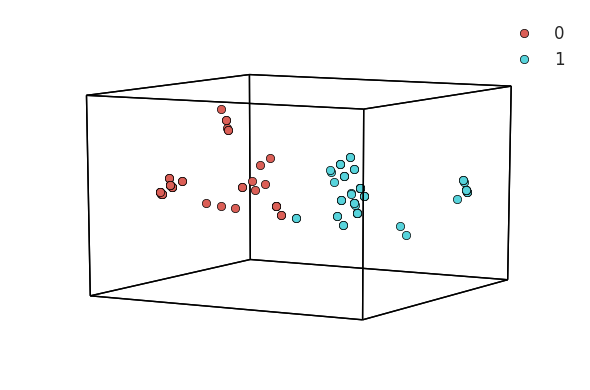

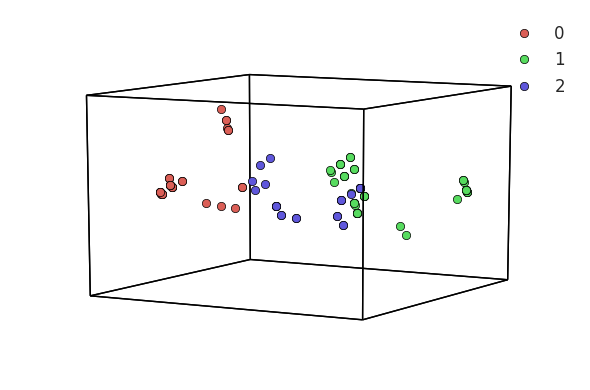

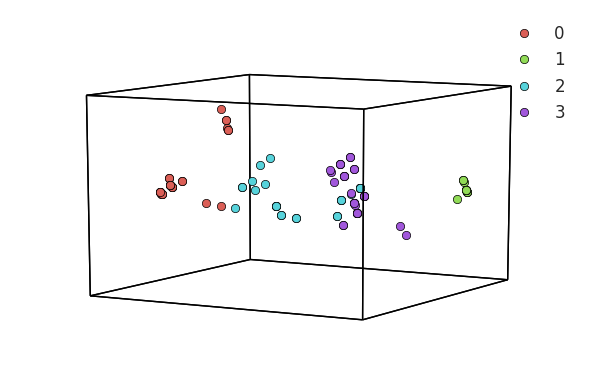

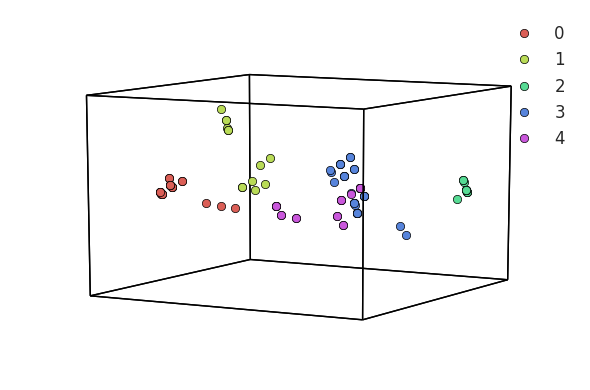

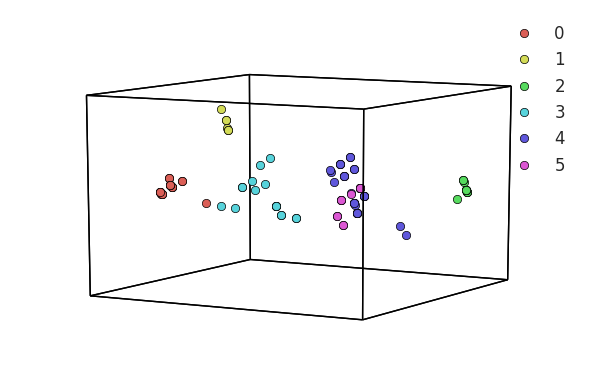

AffinityPropagation
****Results****
<bound method AffinityPropagation.get_params of AffinityPropagation(affinity='euclidean', convergence_iter=15, copy=True,
          damping=0.5, max_iter=200, preference=None, verbose=False)>



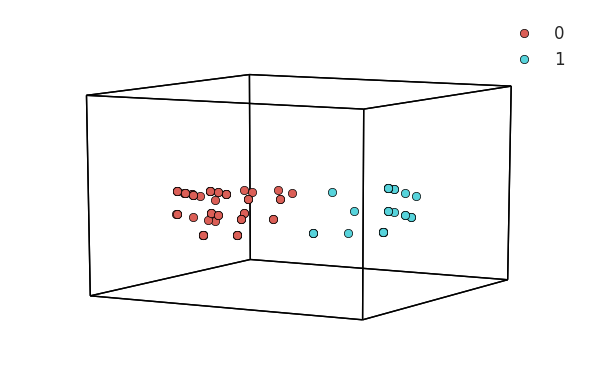

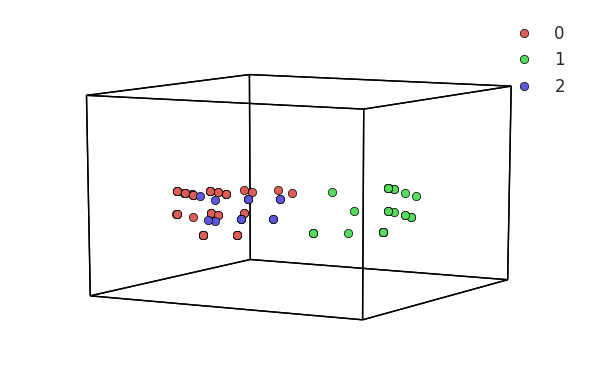

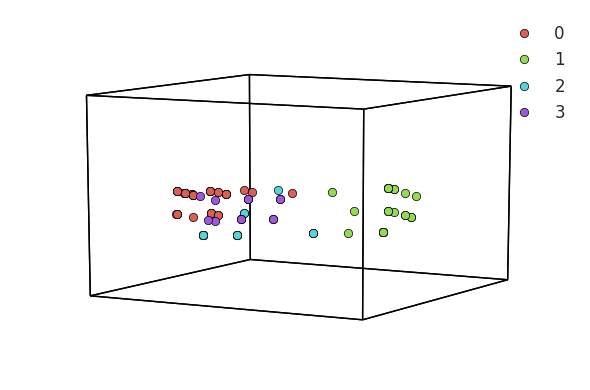

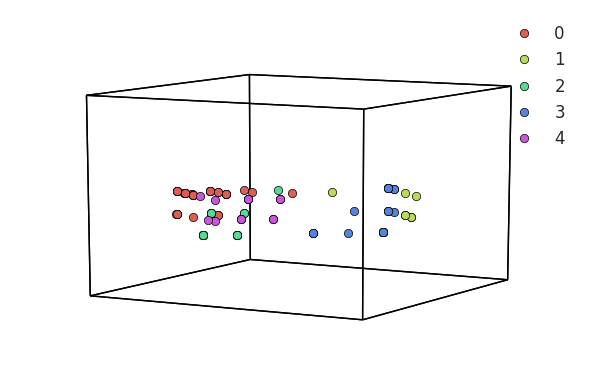

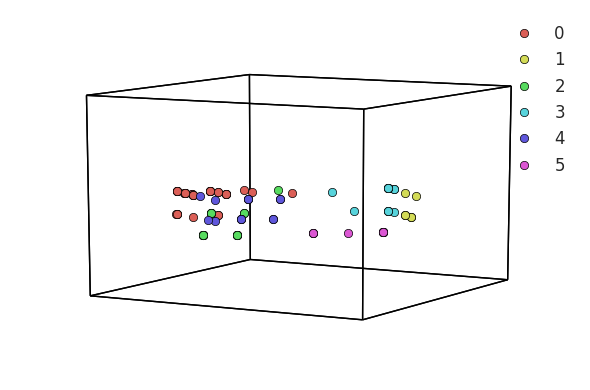

MeanShift
****Results****
<bound method MeanShift.get_params of MeanShift(bandwidth=None, bin_seeding=False, cluster_all=True, min_bin_freq=1,
     n_jobs=1, seeds=None)>


In [52]:
classifiers = [
    Birch(), 
    SpectralClustering(), 
    DBSCAN(),
    AgglomerativeClustering(), 
    AffinityPropagation(), 
    MeanShift()
    ]


for clf in classifiers:
    for i in range(2,7):
        data = clf.fit_predict(pca_train)
        df['class'] = data
        print
        class_labels = hyp.tools.cluster(df, n_clusters=i)
        hyp.plot(df,'o', group=class_labels, legend=list(set(class_labels)))
        name = clf.__class__.__name__
    print("="*30)
    print(name)
    print('****Results****')
    prediction = clf.fit_predict(pca_test)
    params = clf.get_params
    print params
    
print("="*30)